In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../src" not in sys.path:
    sys.path.append("../src")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from tqdm.auto import tqdm
from vec4gloss import check_hashes  

## Data dependencies

```
32.20 => ..\data\token-params-ratings.csv 9fca28
```

In [3]:
data_path = "../data/token-params-ratings.csv"
_ = check_hashes([data_path])

..\data\token-params-ratings.csv 9fca28


## Load resources

In [4]:
raw_data = pd.read_csv(data_path)

In [5]:
raw_data.drop(["cwnid", "target"], axis=1).groupby("pos").median().reindex(list("NVDO"))

,full_nll,masked_nll,replaced_nll,semanticness,contextualness
pos,,,,,
N,0.593909,3.292894,3.997100,3.104136,2.825332
V,0.490258,3.728331,3.213390,2.614008,2.998685
D,0.328676,3.576951,2.220796,1.931385,2.806129
O,0.344315,3.247282,2.730803,1.978800,2.612857


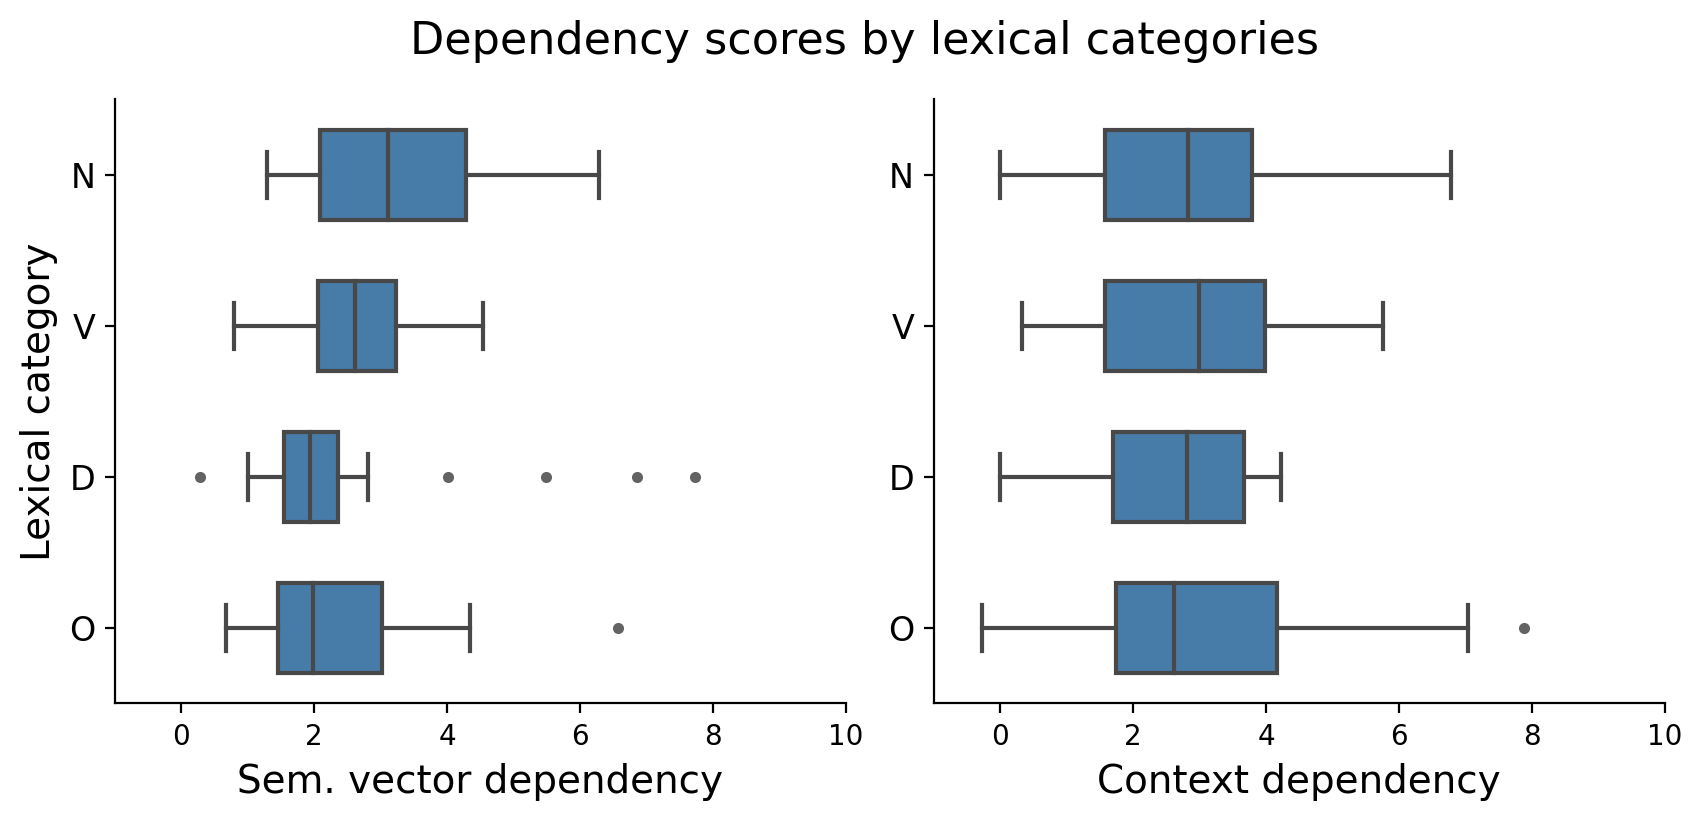

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi=200)

flier_color = cm.get_cmap("tab20c")(16)
box_color = cm.get_cmap("Set1")(1)

box_width = 0.6
flierprops = {"marker": "o", "markersize": 4, 
              "markerfacecolor": flier_color,
              "markeredgecolor": "none"}
sns.boxplot(x="semanticness", y='pos', 
                 data=raw_data, ax=axes[0],
                 width=box_width, color=box_color, flierprops=flierprops)
axes[0].set_xlim((-1,10))
axes[0].set_ylabel("Lexical category", fontsize=14)
axes[0].set_xlabel("Sem. vector dependency", fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
sns.boxplot(x="contextualness", y='pos', 
                 data=raw_data, ax=axes[1], 
                 width=box_width, color=box_color, flierprops=flierprops)
axes[1].set_xlim((-1,10))
axes[1].set_ylabel("")
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)
axes[1].set_xlabel("Context dependency", fontsize=14)
plt.subplots_adjust(wspace=0.12)
for i in range(2):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
fig.suptitle("Dependency scores by lexical categories", 
             fontsize=16)
plot_path = "../data/plots/90.10-dep-scores.png"
fig.savefig(plot_path)

## Ouput Hashes

```
..\data\plots\90.10-dep-scores.png e32c53
```

In [7]:
_ = check_hashes(plot_path)

..\data\plots\90.10-dep-scores.png e32c53
